In [1]:
from Parameters import Parameters, Data
from DataTypeBridges import Pycro
import os

DEBUG:matplotlib:matplotlib data path: c:\Users\Jack\Documents\GitHub\AngelFISH\.venv\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Jack\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Jack\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Jack\.matplotlib\fontlist-v390.json
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7


In [2]:
params = Parameters()
data = Data('Test_Steps')

In [3]:
step = Pycro()

In [4]:
params.load_in_mask = True
params.local_dataset_location =  [os.path.join(os.getcwd(), '..', r'dataBases\JF001_0min_5uM_55')]
params.initial_data_location = None
params.independent_params = {}

In [5]:
output = step.main(**params.__dict__)

Dataset opened                


In [6]:
output['images'][0,0,0,0,0,0].compute()

933

In [7]:
data.append(output)

In [8]:
print(data)

Data(zarr_path=Test_Steps, loaded=True, dataset_keys=['image_locations', 'images', 'independent_params', 'mask_locations', 'masks', 'position_indexs'])


In [9]:
data.images.mean().compute()

3397.2319248253957

In [10]:
data.images[0, 0, 0, 0]

dask.array<getitem, shape=(1024, 1024), dtype=uint16, chunksize=(512, 512), chunktype=numpy.ndarray>

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c

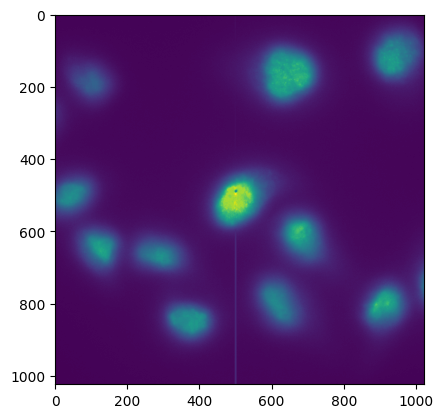

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data.images[0, 0, 1, 10])

In [20]:
import zarr
from joblib import Parallel, delayed


# Define a function to compute the mean of a single image
def compute_mean(image):
    return image.mean()

# Use joblib to parallelize the computation of means across images
image_means = Parallel(n_jobs=-1)(
    delayed(compute_mean)(data.images[i].compute()) for i in range(data.images.shape[0])
)

print(len(image_means))

25


In [21]:
image_means

[5234.135689326695,
 3651.00470082722,
 3451.0139125036817,
 4300.721475586059,
 3978.335655954149,
 3110.963827405657,
 3101.715232894534,
 2662.6715414864675,
 3291.7416983104886,
 2903.6493681196184,
 3554.2862809953235,
 2715.390239064656,
 2735.4689442770823,
 4187.254052510337,
 2029.5805386588686,
 2884.839035125006,
 2509.115660167876,
 3434.837724337502,
 5181.844830089145,
 3329.6260633165875,
 3199.2143888776263,
 3727.577628135681,
 4090.798718618968,
 2384.8832963459076,
 3280.1276176997594]

In [14]:
import dask.array as da

# Convert the image_means list to a Dask array
daImages = data.images
means = daImages.mean(axis=(1, 2, 3, 4, 5)).compute()
print(means.shape)

(25,)


In [15]:
daImages

dask.array<array, shape=(25, 1, 3, 21, 1024, 1024), dtype=uint16, chunksize=(4, 1, 2, 12, 512, 512), chunktype=numpy.ndarray>

In [16]:
means

array([5234.13568933, 3651.00470083, 3451.0139125 , 4300.72147559,
       3978.33565595, 3110.96382741, 3101.71523289, 2662.67154149,
       3291.74169831, 2903.64936812, 3554.286281  , 2715.39023906,
       2735.46894428, 4187.25405251, 2029.58053866, 2884.83903513,
       2509.11566017, 3434.83772434, 5181.84483009, 3329.62606332,
       3199.21438888, 3727.57762814, 4090.79871862, 2384.88329635,
       3280.1276177 ])